## Overview

This file walks users through Library/Set-up, Install, Data Integrity Checks (using Worcester, MA), a town, two samples, and future implementation for this code.

The City (Worcester) and Town (Norwood) example code should not be ran. They require hefty computations and will likely crash Dask.

To compensate, we run these code examples on two samples of the data, 5 structures located in American Samoa and a random partition.

## Setting up Libraries, S3 client, and Dask Dashboard

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import dask_geopandas as dg
import utils as ut

### ATTENTION:
User must follow below instructions and replace the AWS access key and secret access key. This is crucial for the analysis to work.

##### Utilizing data from: https://source.coop/repositories/wherobots/usa-structures/description

All data on Source Cooperative, are hosted on AWS S3 bucket. In order to access them, you need credentials that you can generate on Source Cooperative website. Atfer logging in, click on your name at the top right corner, and then click on your username. Then navigate to "Manage" page on the left side. At the bottom of this page you will find a section called "API Keys". If no key has been generated before, generate a new one and then copy the values for each of the following keys, and paste them in the following cell.

source.coop website: https://source.coop/

###### Source: https://github.com/github.com/HamedAlemo/vector-data-tutorial/scalable_vector_analysis.ipynb

In [ ]:
##################################
#   Read Above 'ATTENTION' Note  #
##################################

AWS_ACCESS_KEY_ID = "<YOUR ACCESS KEY>"
AWS_SECRET_ACCESS_KEY = "<YOUR SECRET ACCESS KEY>"

In [16]:
import boto3
s3_client = boto3.client('s3',
                         aws_access_key_id = AWS_ACCESS_KEY_ID,
                         aws_secret_access_key = AWS_SECRET_ACCESS_KEY,
                         endpoint_url='https://data.source.coop'
                        )

In [ ]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
print(client.dashboard_link)

##### Local path for downloading the data

If running the analysis file within the 'saved'//mounted folder and do NOT wish to save the raw data to your computer - delete the
first local_path and uncomment (remove initial #) on the second one. NOTE: you will have to re-install each time you load this image up if you do that.

In [ ]:
local_path = "./data/"    # saves data to machine
# local_path = '/home/gisuser/data/'   # deletes data after closing the container

## US Structures Data (Installing all of it)

Change the blocksize value if your computer is stronger. This currently sets each block to 16 Megabytes. More details can be found here (ctrl + f 'blocksize'): https://coderzcolumn.com/tutorials/python/dask-dataframes-guide-to-work-with-large-tabular-datasets

Install time will vary. As of 12/9/2024, the dataset is 10 geoparquets each equating to ~2 Gigabytes. This took ~40 minutes to install on my personal machine: ~ 3 Yr Old Laptop, Windows 11, 16 Gb RAM (Docker is limited to 12 Gb), Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, 2592 Mhz, 6 Core(s), 12 Logical Processor(s)

In [18]:
structure_ddf = ut.get_US_structures_all(s3_client, local_path, blocksize = "16M") # "256M" is regular block size

File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.
File already exists locally. No download needed.


In [19]:
structure_ddf.head(3)

,geometry,BUILD_ID,OCC_CLS,PRIM_OCC,SEC_OCC,PROP_ADDR,PROP_CITY,PROP_ST,PROP_ZIP,OUTBLDG,...,USNG,LONGITUDE,LATITUDE,IMAGE_NAME,IMAGE_DATE,VAL_METHOD,REMARKS,UUID,bbox,geohash
0,"MULTIPOLYGON (((-170.8292 -14.32645, -170.8292...",12059,Unclassified,Unclassified,None,None,None,American Samoa,None,None,...,02L NK 18412 16164,-170.829258,-14.326434,104001005B4C3F00,2020-05-14,Automated,None,{245aca01-8d02-4340-810e-3872ee35e7ef},"{'xmin': -170.82931163799998, 'ymin': -14.3264...",2jqw2xvymz0vch1
1,"MULTIPOLYGON (((-170.82798 -14.32867, -170.827...",29894,Unclassified,Unclassified,None,None,None,American Samoa,None,None,...,02L NK 18540 15909,-170.828069,-14.328742,NOAA Topographic LiDAR,2013-01-01,Unverified,None,{a46fac03-1829-47a2-b63f-86d4e52700a8},"{'xmin': -170.82815531799997, 'ymin': -14.3288...",2jqw2xwc12zkvd0
2,"MULTIPOLYGON (((-170.82786 -14.3283, -170.8278...",29886,Unclassified,Unclassified,None,None,None,American Samoa,None,None,...,02L NK 18569 15948,-170.827797,-14.328382,NOAA Topographic LiDAR,2013-01-01,Unverified,None,{4c8bb4a4-86e1-4cb2-908c-a367e7dfa525},"{'xmin': -170.82790860099996, 'ymin': -14.3284...",2jqw2xwgpg8y3ej


In [ ]:
structure_ddf.tail(3)

,geometry,BUILD_ID,OCC_CLS,PRIM_OCC,SEC_OCC,PROP_ADDR,PROP_CITY,PROP_ST,PROP_ZIP,OUTBLDG,...,USNG,LONGITUDE,LATITUDE,IMAGE_NAME,IMAGE_DATE,VAL_METHOD,REMARKS,UUID,bbox,geohash
539725,"MULTIPOLYGON (((174.09103 52.7369, 174.09113 5...",8000048,Government,Non-Civilian Structures,None,None,None,Alaska,None,None,...,60U UD 03622 46972,174.091134,52.736898,NOT AVAILABLE,2018-07-03,Manual,None,{17e345d8-b90d-439d-ad89-7984758ca934},"{'xmin': 174.09102922500006, 'ymin': 52.736834...",zc7u183q9w2fn6e
539726,"MULTIPOLYGON (((174.09056 52.73711, 174.09132 ...",8000047,Government,Non-Civilian Structures,None,None,None,Alaska,None,None,...,60U UD 03627 47013,174.091178,52.737275,NOT AVAILABLE,2018-07-03,Manual,None,{a74622e4-0bc2-4809-9479-e77c6d24abc4},"{'xmin': 174.09055533200012, 'ymin': 52.736969...",zc7u1892ghk2u76
539727,"MULTIPOLYGON (((174.10244 52.73433, 174.10273 ...",8000036,Government,Non-Civilian Structures,None,None,None,Alaska,None,None,...,60U UD 04389 46663,174.102666,52.734406,NOT AVAILABLE,2018-07-03,Manual,None,{17e6eb27-63de-41f4-823b-fa4ff6f4851d},"{'xmin': 174.10243806300002, 'ymin': 52.734255...",zc7u1b18nn6e3h5


##### Notice some columns aren't showing, lets see what they are:

##### We can also further investigate the impacts of blocksize:

In [ ]:
view_middle_columns = structure_ddf.columns[:20]
structure_ddf[view_middle_columns].head(5)

In [ ]:
partition40 = structure_ddf.partitions[40].compute()
partition40.head(5)

,geometry,BUILD_ID,OCC_CLS,PRIM_OCC,SEC_OCC,PROP_ADDR,PROP_CITY,PROP_ST,PROP_ZIP,OUTBLDG,...,USNG,LONGITUDE,LATITUDE,IMAGE_NAME,IMAGE_DATE,VAL_METHOD,REMARKS,UUID,bbox,geohash
0,"MULTIPOLYGON (((-111.71603 40.37411, -111.7161...",6356322,Residential,Single Family Dwelling,None,1000 NORTH 1050 EAST,PLEASANT GROVE,Utah,84062,None,...,12T VK 39208 69537,-111.716103,40.374204,105001001D0AA300,2020-05-04,Automated,None,{94234441-bcf3-4b26-b88b-54b488b7e794},"{'xmin': -111.71617885399996, 'ymin': 40.37411...",9x0t9vfuf15vqc3
1,"MULTIPOLYGON (((-111.7162 40.37468, -111.71619...",6356424,Residential,Single Family Dwelling,None,1053 EAST 1010 NORTH,PLEASANT GROVE,Utah,84062,None,...,12T VK 39188 69584,-111.716341,40.374622,105001001D0AA300,2020-05-04,Automated,None,{ba007b62-1bbe-4538-9d94-ee5a347a3041},"{'xmin': -111.71650439999996, 'ymin': 40.37456...",9x0t9vfxhrj4g6r
2,"MULTIPOLYGON (((-111.71587 40.37469, -111.7158...",6356420,Residential,Single Family Dwelling,None,1061 EAST 1010 NORTH,PLEASANT GROVE,Utah,84062,None,...,12T VK 39218 69584,-111.715985,40.374631,105001001D0AA300,2020-05-04,Automated,None,{4ccca22c-7705-4892-8da4-e00cb91d7f80},"{'xmin': -111.71610170499997, 'ymin': 40.37457...",9x0t9vfzkbsn56z
3,"MULTIPOLYGON (((-111.71567 40.37345, -111.7156...",6356164,Residential,Single Family Dwelling,None,933 NORTH 1100 EAST,PLEASANT GROVE,Utah,84062,None,...,12T VK 39249 69468,-111.715610,40.373586,105001001D0AA300,2020-05-04,Automated,None,{76039646-81e2-4a9d-a77a-70512feb8bac},"{'xmin': -111.71566964299996, 'ymin': 40.37345...",9x0t9vg1jwgyz1x
4,"MULTIPOLYGON (((-111.71552 40.37399, -111.7155...",6356225,Residential,Single Family Dwelling,None,967 NORTH 1100 EAST,PLEASANT GROVE,Utah,84062,None,...,12T VK 39251 69504,-111.715594,40.373907,105001001D0AA300,2020-05-04,Automated,None,{e06859b7-dd6e-42d3-8f92-dcae99305093},"{'xmin': -111.71568185699999, 'ymin': 40.37381...",9x0t9vg5jbccvg3


In [ ]:
partition40.shape

(873670, 29)

Each partition has 16mb of data, roughly 873,670 rows. This will vary based on the blocksize chosen when calling the ut.get_US_structures_all() function.

## Data Checks (for spatial joins)

#### If you go on to review another state. You may need to re-project the CRS. The following is a good site for visually seeing what the EPSG covers
https://spatialreference.org/ref/epsg/2249/

##### Coordinate Reference System (CRS)
When calculating areas, plotting, performing spatial joins, etc. you will want to set the CRS for your data. This dataframe already has a square footage column, so we do not need to do this, but I will give an example.

The .head() of this dataframe is American Samoa structures. We will create a new filtered dataframe with only those 5 American Samoa structures. Re-project the CRS. Then calculate the areas based on the geometry of each structure. This will be compared to the datasets SQFEET column to understand how picking the right CRS matters.

First, we will check to see if we need to project to a CRS for the first time, or re-project the current one. To check if the data has a CRS, the following code will suffice.

In [ ]:
structure_ddf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We will have to re-project for an appropraite EPSG for our area of interest. The entire dataset is in: 4326.

A possible EPSG for American Samoa is 3102
https://epsg.io/3102

In [21]:
american_samoa_ddf = structure_ddf.head(5)

In [22]:
american_samoa_ddf = american_samoa_ddf.to_crs(epsg=3102)

In [23]:
american_samoa_ddf['structure_size'] = american_samoa_ddf.geometry.area

##### Compare with the data's 'SQFEET' column to see if these are similar values

In [29]:
area_columns = american_samoa_ddf.columns[[12, 29]]
american_samoa_ddf[area_columns].head(5)

,SQFEET,structure_size
0,640.533569,791.786561
1,3078.481689,3080.954507
2,2195.848877,2197.612614
3,3078.472412,3080.945218
4,904.162659,904.888883


In [ ]:
desired_columns = american_samoa_ddf.columns[10:30]
american_samoa_ddf[desired_columns].head(5)

,HEIGHT,SQMETERS,SQFEET,H_ADJ_ELEV,L_ADJ_ELEV,FIPS,CENSUSCODE,PROD_DATE,SOURCE,USNG,LONGITUDE,LATITUDE,IMAGE_NAME,IMAGE_DATE,VAL_METHOD,REMARKS,UUID,bbox,geohash,structure_size
0,0.0,59.507576,640.533569,NaN,NaN,60050,60050951600,2021-04-09,ORNL,02L NK 18412 16164,-170.829258,-14.326434,104001005B4C3F00,2020-05-14,Automated,None,{245aca01-8d02-4340-810e-3872ee35e7ef},"{'xmin': -170.82931163799998, 'ymin': -14.3264...",2jqw2xvymz0vch1,791.786561
1,0.0,286.000580,3078.481689,NaN,NaN,60050,60050951600,2013-01-01,NOAA,02L NK 18540 15909,-170.828069,-14.328742,NOAA Topographic LiDAR,2013-01-01,Unverified,None,{a46fac03-1829-47a2-b63f-86d4e52700a8},"{'xmin': -170.82815531799997, 'ymin': -14.3288...",2jqw2xwc12zkvd0,3080.954507
2,0.0,204.001236,2195.848877,NaN,NaN,60050,60050951600,2013-01-01,NOAA,02L NK 18569 15948,-170.827797,-14.328382,NOAA Topographic LiDAR,2013-01-01,Unverified,None,{4c8bb4a4-86e1-4cb2-908c-a367e7dfa525},"{'xmin': -170.82790860099996, 'ymin': -14.3284...",2jqw2xwgpg8y3ej,2197.612614
3,0.0,285.999725,3078.472412,NaN,NaN,60050,60050951600,2013-01-01,NOAA,02L NK 18594 15936,-170.827566,-14.328497,NOAA Topographic LiDAR,2013-01-01,Unverified,None,{22106c1f-562e-4468-a496-32d407fd8b4f},"{'xmin': -170.82767668499997, 'ymin': -14.3286...",2jqw2xx4mn23x0c,3080.945218
4,0.0,83.999542,904.162659,NaN,NaN,60050,60050951600,2013-01-01,NOAA,02L NK 18636 15935,-170.827176,-14.328503,NOAA Topographic LiDAR,2013-01-01,Unverified,None,{bc01e591-8516-49bf-b66e-dd21667de2f7},"{'xmin': -170.82721784799998, 'ymin': -14.3285...",2jqw2xx6qm2znys,904.888883


Scrolling on the above dataframe to compare the 3rd column with the last column, you will notice some values are closer than others. CRS is important, and if we did this same CRS for Utah, we would see completely wrong results. We could also investigate how this dataset calculates the SQFEET column and possibly find the exact CRS that was used for each section.

Moving forward we will utilize the dataframes 'SQFEET' column!

We can also review specific columns that may be valuable, this is shown in the samples section!

### Geometry
Another feature of spatial data that is important is the geometry. The geometry is crucial for any joins or plotting. We detail this in the next section.

## Dataset Integrity

This section shows an example of questions you need to be asking each time you load in a dataset. It is important to verify work so you know the best way to analyze the dataset. Our dataset has columns that specify the state and/or city that a structure is in. However, these columns have blanks as not every structure is identified. For this reason, I want to investigate how many buildings don't get identified.

I will use the city of worcester shapefile from the city government's website. Whenever downloading a shapefile, make sure you get all the other files that come with it: .shp, .cpg, .dbf, .prj, .shx, and .xml

I'll compare the shapefile to 2 different dataframes:

1. The first dataframe will be the entire dataset, no filtering based on columns.

2. The second dataframe will make a dataframe of buildings/rows that are identified as Massachusetts. Then from that dataframe, I will grab a new one for buildings/rows that are identified as Worcester.


Next, I will compute the number of rows for each spatial join with the Worcester Shapefile. A user can decide if one is 'better' than the other. You also have to consider computational power. If you only lose 100 out of 100,000 buildings, is it worth it to save computational power? I think yes, but it all depends on your analysis and abilities. You will not see the outputs from most '.compute()' lines of code, that is due to a weak computational power on my personal machine. Any computation should be ran with caution, especially those on the entire dataset. I will try to include warnings (AND comment out code) before each compute to remind the user.

The Worcester Shapefile can be found here: https://opendata.worcesterma.gov/datasets/worcesterma::city-boundary-1/about

Since we are analyzing Massachusetts (City: Worcester, Town: Norwood), and the shapefile we retreived from the City of Worcester was in 2249, we will use 2249.

EPSG:2249 covers both Massachusetts counties we analyze (Worcester and Norfolk), this is in US Survey feet which means we don't need to worry about converting from meters to feet.

In [30]:
massachusetts_ddf = structure_ddf[structure_ddf['PROP_ST'] == 'Massachusetts'] # Filter for Massachusetts buildings
massachusetts_ddf = massachusetts_ddf.to_crs(epsg=2249) # use a CRS that works for Worcester and Norwood
worcester_PROP_CITY_ddf = massachusetts_ddf[massachusetts_ddf['PROP_CITY'] == 'Worcester'] # Filter for Worcester buildings

In [33]:
worcester_boundary = dg.read_file(f"./data/Worcester/City_Boundary.shp", chunksize = 7500) # chunksize specifies number of rows per chunk

##### If the above line of code gave you an error similar to:
'ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/envs/us_structures_analysis/share/proj failed'

Try re-running it

In [34]:
# confirm crs
worcester_boundary.crs

<Projected CRS: EPSG:2249>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [35]:
worcester_boundary.compute() # insight to the shapefile layout.

,TOWN,TOWN_ID,TOWNS_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,ISLAND,...,FIPS_PLACE,FIPS_MCD,FIPS_COUNT,ACRES,SQUARE_MIL,GlobalID,OBJECTID,Shape__Are,Shape__Len,geometry
0,WORCESTER,348,261,159843,169759,172648,9916,2889,C,0,...,82000,25027030,27,24602.486,384.411,642fd55c-8273-4e35-993c-d5d0e1eaf706,1,1.071680e+09,139826.751833,"POLYGON ((583605.513 2938565.252, 586219.333 2..."


As noted in the Data Checks section, we must check the geometry files are proper for the join.
The structure_ddf.head(5) line and the above worcester_boundary.compute() will show how the geometry columns are named. The prints confirm they are
the same.

In [36]:
massachusetts_ddf = massachusetts_ddf.set_geometry('geometry')
worcester_boundary = worcester_boundary.set_geometry('geometry')
print(structure_ddf.geometry.name)
print(worcester_boundary.geometry.name)

geometry
geometry


Here we WOULD count the number of rows that each spatial join gives. However, the dataset is still too large! Not advised to run the commented out cell blocks!

##### NOTE: To perform a spatial join, both dataframes must be in the same CRS. We will have to project the entire dataframe to EPSG:2249. If you wish to analyze other areas, you will have to change the CRS again. Keep this in mind!

In [37]:
structure_ddf = structure_ddf.to_crs(epsg=2249)

In [38]:
worcester_entire_ddf = dg.sjoin(structure_ddf, worcester_boundary, how='inner', predicate='within')
# within makes sure the whole structure_ddf row is inside the worcester_boundary
# Understand this approach may mean some of the structure_ddf rows near the boundary won't be included if the shapefile is different by just a little.

worcester_PROP_ddf = dg.sjoin(worcester_PROP_CITY_ddf, worcester_boundary, how='inner', predicate='within')

In [ ]:
# entire_df_worcester_rows = worcester_entire_ddf.count().compute()
# entire_df_worcester_rows

In [ ]:
# filtered_by_columns_worcester_rows = worcester_PROP_ddf.count().compute()
# filtered_by_columns_worcester_rows

## Town Example

The goal of adding a town example is that it will have less computation requirements than a city. Note: my computer still could not handle this (and Google Colab)! Also, this is relying on filtering dataset by column names, but the zip codes seemed more filled in ('PROP_ZIP') than state or city, so hoping this is sufficient.

User could also grab a shapefile for Norwood, MA and use the original structure_ddf to spatial join with it. Remember: the structure_ddf has already been updated for the CRS, so you will not have to update again (unless picking a region that uses a new CRS)

In [42]:
norwood_ddf = massachusetts_ddf[massachusetts_ddf['PROP_ZIP'] == '02062']

##### Find number of structures in Norwood that are part of dataset (Computing Disclaimer)

In [ ]:
# norwood_ddf.shape[0].compute()

##### Find the average structure size (using dataset's SQFEET column, not the one we created) (Computing Disclaimer)

In [ ]:
# norwood_ddf['SQFEET'].mean().compute()

##### Make a histogram of structure sizes (Computing Disclaimer)

In [ ]:
# sqfeet_data = norwood_ddf['SQFEET']
# norwood_sqfeet = sqfeet_data.compute()


# plt.hist(norwood_sqfeet, bins = 300, edgecolor='black')
# plt.xlabel('Area (in ft^2)')
# plt.ylabel('Frequency')
# plt.title('area_in_square_feet for Norwood Buildings')
# plt.show()

## Using above code examples on the partition40 and american_samoa samples

#### American Samoa

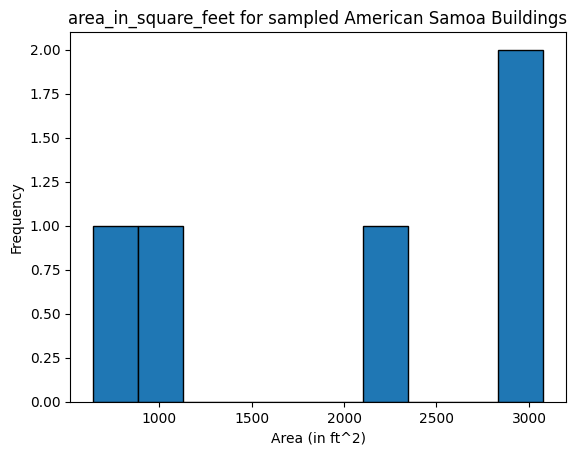

In [51]:
plt.hist(american_samoa_ddf.SQFEET, edgecolor='black')
plt.xlabel('Area (in ft^2)')
plt.ylabel('Frequency')
plt.title('area_in_square_feet for sampled American Samoa Buildings')
plt.show()

In [57]:
# Number of Structures
AmS_totalStructures = american_samoa_ddf.shape[0]
AmS_totalStructures

5

In [59]:
# Average Structure Size
AmS_avgSize = american_samoa_ddf.SQFEET.mean()
AmS_avgSize

1979.5

In [62]:
# Unique Number of Census Blocks
AmS_uniqueBlocks = american_samoa_ddf.CENSUSCODE.nunique()
AmS_uniqueBlocks

1

In [ ]:
structure_ddf['VAL_METHOD'].unique().compute() # See what else can be put in this column besides 'Automatic' and 'Unverified'

In [ ]:
structure_ddf['SOURCE'] == 'NOAA' # Find only NOAA Imagery data

#### Partition 40 - Note: we already ran .compute() on this so you will not see that repeated!

In [ ]:
plt.hist(partition40.SQFEET, edgecolor='black')
plt.xlabel('Area (in ft^2)')
plt.ylabel('Frequency')
plt.title('area_in_square_feet for sampled American Samoa Buildings')
plt.show()

In [ ]:
# Number of Structures
p40_totalStructures = partition40.shape[0]
p40_totalStructures

In [ ]:
# Average Structure Size
p40_avgSize = partition40['SQFEET'].mean()
p40_avgSize

In [ ]:
# Unique Number of Census Blocks
p40_uniqueBlocks = partition40['CENSUSCODE'].nunique()
p40_uniqueBlocks

## Future Implementation

- Utilize selenium python package and create a function that can go onto Worcester website and download the shapefile

Selenium can auto-scroll, click buttons, etc. for web-scraping purposes.
- Provide plotting examples (was hesitant to attempt since I can't compute anything)
- Census Data (section started below)

## Census Data

Notice the original structure_ddf dataframe has a census block column, 'CENSUSCODE'. This can be used when drawing comparisons. You can also utilize the FIPS as well. Federal Information Processing System (FIPS) Codes for States and Counties. These unique geographic identifiers can allow analyses at the several levels (i.e., countrywide, state, county).

Understanding Census Codes: https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html

In [54]:
# Download Process:

#### Create a function to download country wide census data (depending on the size. Maybe just do cities/Massachusetts and just provide a link)

##### Possible Analyses:
Review Census data within Worcester. Grab the shapefiles for two of the census blocks. spatial filter & intersection with the dataset again.

Then review and draw relationships from the data